# AUTHOR : Makinde Segun Israel

# The data
This dataset presents the outcomes of a chemical examination conducted on wines cultivated in a single region in Italy, originating from three distinct grape varieties.

'https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/wine_clustering.csv'


# Aim of analysis

- The analysis is aimed to quantify the levels of 13 different components present in each type of wine.

- This clustering analysis will aid winemakers in quality control, product segmentation, and even in creating targeted marketing strategies based on the identified wine clusters.

### List of Chemicals Components
- Alcohol
- Malic Acid
- Ash
- Alcalinity of Ash
- Magnesium
- Phenols
- Flavonoids
- Non-Flavonoid Phenols
- Proanthocyanins
- Color Intensity
- Hue
- OD280/OD315 of Diluted Wines (Indicator of phenolic content)
- Proline

# Insights and Recommendations From Analysis

The heatmap and barcharts visualizes the mean values of different wine componets across three clusters. Here are what we can infer about wine quality, sales, demands and producer insights from the dataset

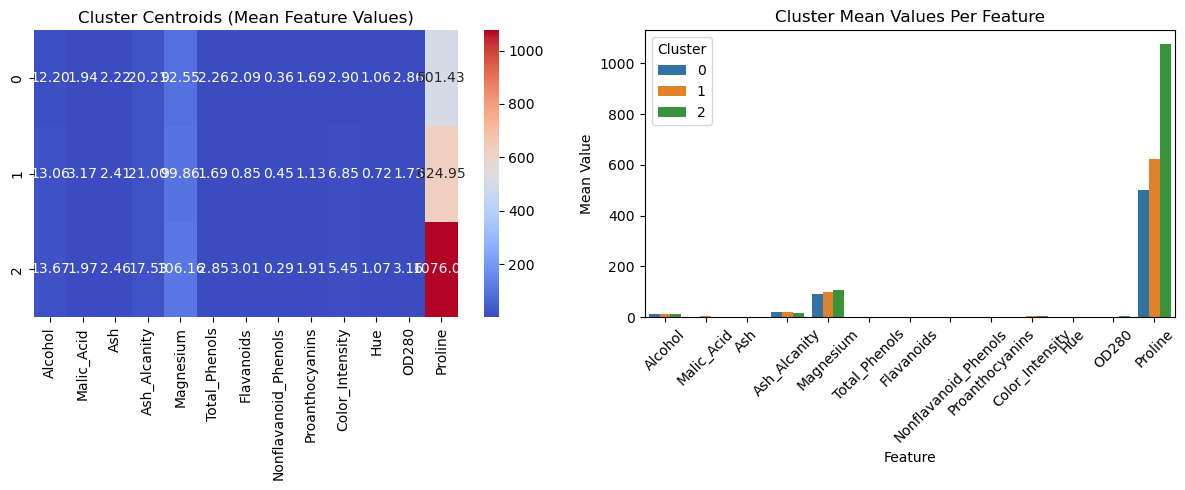

In [ ]:
# @title
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Increased figure width for better display

# Heatmap
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])  # Correct axes access
axes[0].set_title("Cluster Centroids (Mean Feature Values)")

# Bar Plot
cluster_means_melted = cluster_summary.reset_index().melt(id_vars="index", var_name="Feature", value_name="Mean Value")
sns.barplot(x="Feature", y="Mean Value", hue="index", data=cluster_means_melted, palette="tab10", ax=axes[1])  # Correct axes access
axes[1].set_title("Cluster Mean Values Per Feature")
axes[1].tick_params(axis='x', rotation=45)  # Correct tick rotation
axes[1].set_ylabel("Mean Value")
axes[1].set_xlabel("Feature")
axes[1].legend(title="Cluster")

plt.tight_layout() #prevents overlapping of plots.
plt.show()

##### QUALITY OF WINE
   - Cluster2 contains a significant high-level of Proline (an amino acid asociated with better aging)
   - Therefore cluster2 may have higher quality and aging capability
   - Flavonoids & Total Phenols (Compounds that contribute to antioxidants properties and bitterness) are balanced across the three clusters
   - Higher Flavonoids wines indicates premium wines
   - Colour intensity differs among clusters. Higher colours intensity often corellates with stronger flavour and better aging(red wines)


##### SALES OF WINE
- Cluster 2 wines (high Proline) may be more premium appealing to connoisseurs willing to pay more
- Clusters with balanced alcohol (Metalic Acid) may have wider market appeal, attracting casual drinkers
- Wines with exexessive Melic Acid could be too acidic, posibly reducing sales in some markets

##### DEMAND IN WINE
- Low-alcohol wines (Cluster 0 and 1) may attract health-conscious consumers.
- Cluster 2 may be in high demand for aged, premium wines, given its higher Proline and Phenols.
- If cluster 1 has moderate values, it may be the most commercially viable appealing to both casual and premium drinkers.

##### INSIGHT FOR WINE PRODUCERS
- If targeting premium wines, focus on Cluster 2 characteristics ( high Proline and Phenols)
- For mass-market wines, balance Alcohol, Phenols, and Acidity to match Cluster 1's profile
- Adjust acidity levels (Malic Acid) to create smother wines that appeals to a larger audience
  
                                                                  

##### INSIGHT FOR DISTRIBUTORS
- Premium wine sellers should focus on characteristics of Cluster 2 wines
- Retailers targeting casual consumers should focus on Cluster 0 and 1
- Knowing which cluster alighns with consumer demand can help optimize inventory


##### INSIGHT FOR RETAILERS
- If selling to health-conscious consumer, wines with modrate alcohol and high phenols should be promoted
- If targeting premium buyers, showcase Cluster 2 wines as high-end selections

##### SUMMARY
- Cluster 2 wines appear to be premium, aged well, and rich in Proline and Phenols
- Cluster 1 may have the best balane of acidity, alcohol, and phenols - making it commercially viable
- Cluster 0 could represent lighter wines, possibly appealing to casual drinkers

# Coding

In [ ]:
# Library importation

# data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/wine_clustering.csv')
data.info()

# Scaling, Hierarchical clustering and dendrogram visualisation

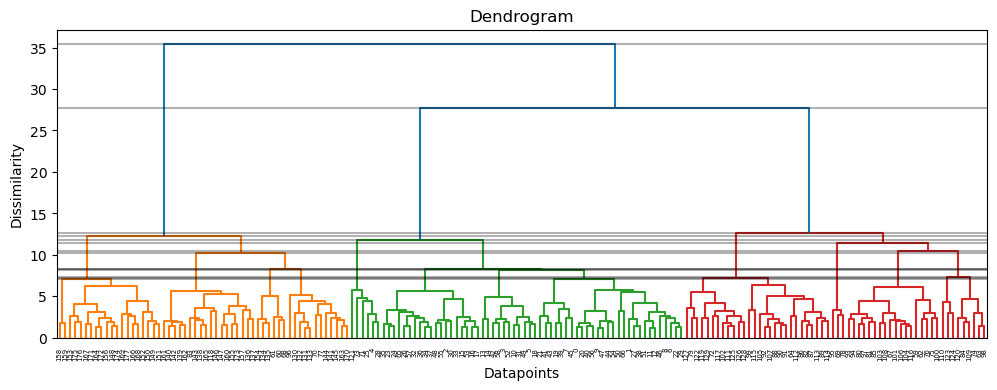

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_scaled = pd.DataFrame(X_scaled)

# Hierarchical clustering and dendrogram visualisation


from scipy.cluster.hierarchy import ward, linkage
import scipy.cluster.hierarchy as sch

linkage_matrix = linkage(X_scaled, method="ward")
fig = plt.figure(figsize=(12, 4))
sch.dendrogram(linkage_matrix)
z = linkage_matrix[:,2]
for i in range(1, 15):
    r = [z[-i],z[-i]]
    d = [0, 40000]
    plt.plot(d, r, 'black', alpha=0.3)

plt.title('Dendrogram')
plt.xlabel('Datapoints')
plt.ylabel('Dissimilarity')
plt.show()


## 📌 Interpretation:


This give a clue that our dataset is best clustered into 3

# Building Agglomerative Cluster Model with k=3

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

hc =  AgglomerativeClustering(n_clusters=3, linkage="ward")
clusters = hc.fit_predict(X_scaled)

# Interpretation of cluster characteristics

In [ ]:
cluster_summary = data.groupby(clusters).agg("mean")
cluster_summary.reset_index()
cluster_summary

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,12.203966,1.938966,2.215172,20.208621,92.551724,2.262931,2.088103,0.355345,1.686552,2.895345,1.060000,2.862241,501.431034
1,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429
2,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875


### Viusalizing cluster summary using heatmap

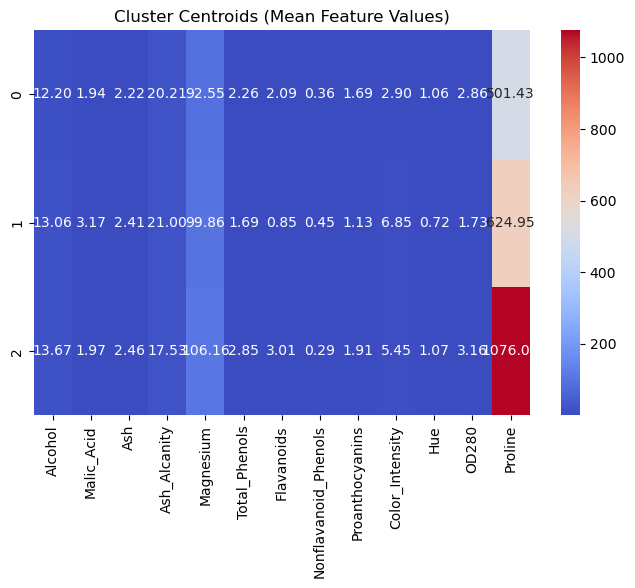

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cluster Centroids (Mean Feature Values)")
plt.show()

### Viusalizing cluster summary using barchart

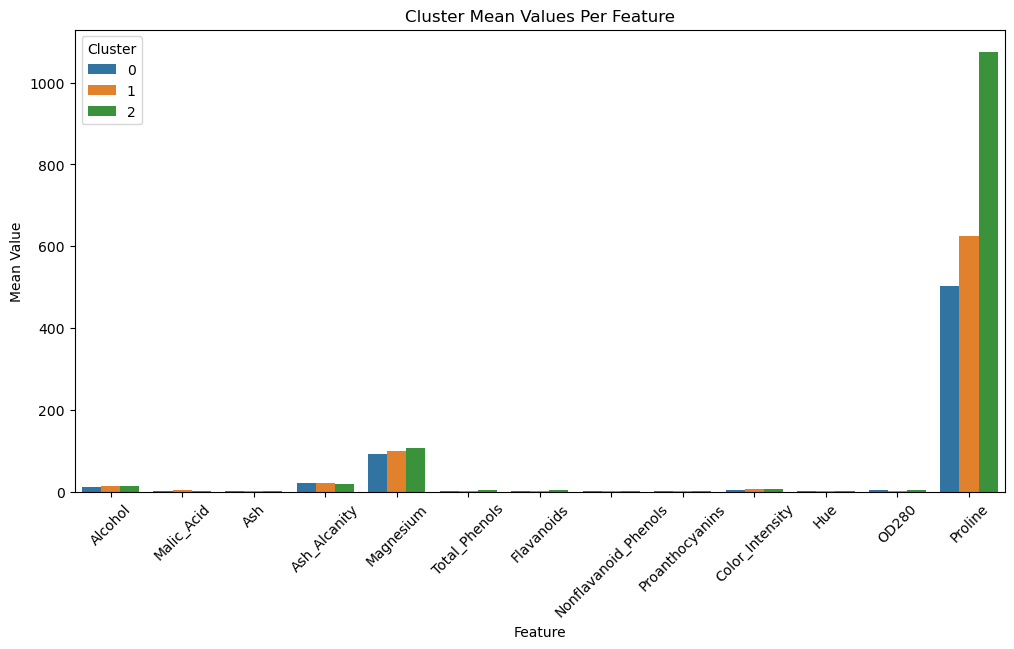

In [ ]:
cluster_means_melted = cluster_summary.reset_index().melt(id_vars="index", var_name="Feature", value_name="Mean Value")

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x="Feature", y="Mean Value", hue="index", data=cluster_means_melted, palette="tab10")

plt.title("Cluster Mean Values Per Feature")
plt.xticks(rotation=45)
plt.ylabel("Mean Value")
plt.xlabel("Feature")
plt.legend(title="Cluster")
plt.show()